# UN World Happiness report 2021

![](https://worldhappiness.report/assets/images/icons/whr-cover-ico.png)

The happiness score and ranking use data from Gallup World Poll. The columns following the happiness score estimate the extent to which each of the six factors: economic production, generosity, social support, life expectancy, freedom, absence of curroption - contribute to making life evaluations higher in each country.

We will look at the distribution of the factors, most and least happiest countries in the year 2021 and compare the data with that from previous year, and look at the relation between the happiness score and the various features contributing in it.

Link to dataset [here](https://www.kaggle.com/ajaypalsinghlo/world-happiness-report-2021)

Libraries used:
- Pandas
- Numpy
- Matplotlib
- Seaborn

In [1]:
# commit the work to jovian
import jovian

project_name = 'UN world happiness report 2021'
jovian.commit(project = project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "darpit-choudhary/un-world-happiness-report-2021" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/darpit-choudhary/un-world-happiness-report-2021


'https://jovian.ai/darpit-choudhary/un-world-happiness-report-2021'

In [2]:
# libraries

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['figure.figsize'] = (12,6)
matplotlib.rcParams['font.size'] = 14

## Downloading the dataset

I have manually downloaded the dataset from the link in the description, and uploaded using Jupyter's GUI.

In [3]:
os.listdir('.')

['.bash_logout',
 '.profile',
 '.bashrc',
 'world-happiness-report.csv',
 'world-happiness-report-2021.csv',
 '.ipynb_checkpoints',
 '.ipython',
 '.local',
 '.cache',
 '.jovianrc',
 'UN_world_happiness_report_project.ipynb',
 '.jupyter',
 '.jovian',
 '.config',
 '.conda',
 '.wget-hsts',
 '.git',
 'work',
 '.npm']

In [4]:
# dataframe
world_happiness_df = pd.read_csv('world-happiness-report.csv')
world_happiness_2021_df = pd.read_csv('world-happiness-report-2021.csv')

In [5]:
world_happiness_df # data before 2021

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268
...,...,...,...,...,...,...,...,...,...,...,...
1944,Zimbabwe,2016,3.735,7.984,0.768,54.40,0.733,-0.095,0.724,0.738,0.209
1945,Zimbabwe,2017,3.638,8.016,0.754,55.00,0.753,-0.098,0.751,0.806,0.224
1946,Zimbabwe,2018,3.616,8.049,0.775,55.60,0.763,-0.068,0.844,0.710,0.212
1947,Zimbabwe,2019,2.694,7.950,0.759,56.20,0.632,-0.064,0.831,0.716,0.235


The `world_happiness_df` dataframe contains data from over 160 countries over the period of 16 years (2005-2020). However, the earlier data is not available for some countries, so we will limit our discussion to years 2017-2020 to provide a more up-to-date analysis.

The dataset contains more than 1900 rows, and 11 columns.

To make our analysis easier we replaced the whitespaces in column names with '_'.

In [6]:
world_happiness_2021_df.columns

Index(['Country name', 'Regional indicator', 'Ladder score',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')

In [7]:
# helper funciton to remove whitespace in column name
def remove_white(col_series):
    return col_series.str.replace(' ', '_')

In [8]:
world_happiness_df.columns = remove_white(world_happiness_df.columns)
world_happiness_2021_df.columns = remove_white(world_happiness_2021_df.columns)

In [9]:
world_happiness_2021_df

,Country_name,Regional_indicator,Ladder_score,Standard_error_of_ladder_score,upperwhisker,lowerwhisker,Logged_GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Ladder_score_in_Dystopia,Explained_by:_Log_GDP_per_capita,Explained_by:_Social_support,Explained_by:_Healthy_life_expectancy,Explained_by:_Freedom_to_make_life_choices,Explained_by:_Generosity,Explained_by:_Perceptions_of_corruption,Dystopia_+_residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.000,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.700,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.400,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.000,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.400,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,Lesotho,Sub-Saharan Africa,3.512,0.120,3.748,3.276,7.926,0.787,48.700,0.715,-0.131,0.915,2.43,0.451,0.731,0.007,0.405,0.103,0.015,1.800
145,Botswana,Sub-Saharan Africa,3.467,0.074,3.611,3.322,9.782,0.784,59.269,0.824,-0.246,0.801,2.43,1.099,0.724,0.340,0.539,0.027,0.088,0.648
146,Rwanda,Sub-Saharan Africa,3.415,0.068,3.548,3.282,7.676,0.552,61.400,0.897,0.061,0.167,2.43,0.364,0.202,0.407,0.627,0.227,0.493,1.095
147,Zimbabwe,Sub-Saharan Africa,3.145,0.058,3.259,3.030,7.943,0.750,56.201,0.677,-0.047,0.821,2.43,0.457,0.649,0.243,0.359,0.157,0.075,1.205


`world_happiness_2021_df` contains data for 149 countries (rows), and 20 columns.

Columns:
- **Ladder_score**: Happiness score or subjective well-being on the scale of 0 to 10. This is the national average response.
- **Logged_GDP_per_capita**: natural log of GDP per capita, more about significance of using log of GDP per capita [here](https://growthecon.wordpress.com/2016/01/13/calculating-growth-rates/).
- **Social_support**: Social support refers to assistance provided by the social network to an individual.
- **Healthy_life_expectancy**: average life span in good health - that is to say without any hinderence in daily life or incapacities.
- **Freedom_to_make_life_choices**: national average of the binomial responses (0 or 1).
- **Generosity**: Generosity is the residual of regressing national average of response to the GWP question “Have you donated money to a charity in the past month?” on GDP per capita.
- **Perceptions_of_corruption**: national average of the survey responses.
- **Ladder_score_in_Dystopia**: worlds lowest national averages. Dystopia is an imaginary country that has the world's least-happy people.

Other columns contain the information regarding the net contribution of each of the factors discussed above in the ladder score.

In [10]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "darpit-choudhary/un-world-happiness-report-2021" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/darpit-choudhary/un-world-happiness-report-2021


'https://jovian.ai/darpit-choudhary/un-world-happiness-report-2021'

#### Info about the data

In [11]:
# details about the data
world_happiness_2021_df.describe().style.background_gradient()

,Ladder_score,Standard_error_of_ladder_score,upperwhisker,lowerwhisker,Logged_GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Ladder_score_in_Dystopia,Explained_by:_Log_GDP_per_capita,Explained_by:_Social_support,Explained_by:_Healthy_life_expectancy,Explained_by:_Freedom_to_make_life_choices,Explained_by:_Generosity,Explained_by:_Perceptions_of_corruption,Dystopia_+_residual
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.532839,0.058752,5.648007,5.417631,9.432208,0.814745,64.992799,0.791597,-0.015134,0.727450,2.430000,0.977161,0.793315,0.520161,0.498711,0.178047,0.135141,2.430329
std,1.073924,0.022001,1.054330,1.094879,1.158601,0.114889,6.762043,0.113332,0.150657,0.179226,0.000000,0.404740,0.258871,0.213019,0.137888,0.098270,0.114361,0.537645
min,2.523000,0.026000,2.596000,2.449000,6.635000,0.463000,48.478000,0.382000,-0.288000,0.082000,2.430000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.648000
25%,4.852000,0.043000,4.991000,4.706000,8.541000,0.750000,59.802000,0.718000,-0.126000,0.667000,2.430000,0.666000,0.647000,0.357000,0.409000,0.105000,0.060000,2.138000
50%,5.534000,0.054000,5.625000,5.413000,9.569000,0.832000,66.603000,0.804000,-0.036000,0.781000,2.430000,1.025000,0.832000,0.571000,0.514000,0.164000,0.101000,2.509000
75%,6.255000,0.070000,6.344000,6.128000,10.421000,0.905000,69.600000,0.877000,0.079000,0.845000,2.430000,1.323000,0.996000,0.665000,0.603000,0.239000,0.174000,2.794000
max,7.842000,0.173000,7.904000,7.780000,11.647000,0.983000,76.953000,0.970000,0.542000,0.939000,2.430000,1.751000,1.172000,0.897000,0.716000,0.541000,0.547000,3.482000


In [12]:
world_happiness_df.describe().style.background_gradient()

,year,Life_Ladder,Log_GDP_per_capita,Social_support,Healthy_life_expectancy_at_birth,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Positive_affect,Negative_affect
count,1949.000000,1949.000000,1913.000000,1936.000000,1894.000000,1917.000000,1860.000000,1839.000000,1927.000000,1933.000000
mean,2013.216008,5.466705,9.368453,0.812552,63.359374,0.742558,0.000103,0.747125,0.710003,0.268544
std,4.166828,1.115711,1.154084,0.118482,7.510245,0.142093,0.162215,0.186789,0.107100,0.085168
min,2005.000000,2.375000,6.635000,0.290000,32.300000,0.258000,-0.335000,0.035000,0.322000,0.083000
25%,2010.000000,4.640000,8.464000,0.749750,58.685000,0.647000,-0.113000,0.690000,0.625500,0.206000
50%,2013.000000,5.386000,9.460000,0.835500,65.200000,0.763000,-0.025500,0.802000,0.722000,0.258000
75%,2017.000000,6.283000,10.353000,0.905000,68.590000,0.856000,0.091000,0.872000,0.799000,0.320000
max,2020.000000,8.019000,11.648000,0.987000,77.100000,0.985000,0.698000,0.983000,0.944000,0.705000


In [13]:
world_happiness_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country_name                      1949 non-null   object 
 1   year                              1949 non-null   int64  
 2   Life_Ladder                       1949 non-null   float64
 3   Log_GDP_per_capita                1913 non-null   float64
 4   Social_support                    1936 non-null   float64
 5   Healthy_life_expectancy_at_birth  1894 non-null   float64
 6   Freedom_to_make_life_choices      1917 non-null   float64
 7   Generosity                        1860 non-null   float64
 8   Perceptions_of_corruption         1839 non-null   float64
 9   Positive_affect                   1927 non-null   float64
 10  Negative_affect                   1933 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 167.6+ KB


In [14]:
world_happiness_2021_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country_name                                149 non-null    object 
 1   Regional_indicator                          149 non-null    object 
 2   Ladder_score                                149 non-null    float64
 3   Standard_error_of_ladder_score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged_GDP_per_capita                       149 non-null    float64
 7   Social_support                              149 non-null    float64
 8   Healthy_life_expectancy                     149 non-null    float64
 9   Freedom_to_make_life_choices                149 non-null    float64
 10  Generosity    

In both the data frames except `Country_name` all other columns have values of either `int` type or `float` type. And there don't seem to be any invalid or incorrect value. 

For some countries data for the year 2020 is not available.

In [15]:
before_2021_df = world_happiness_df[world_happiness_df['year'] >= 2017].copy()

In [16]:
before_2021_df

,Country_name,year,Life_Ladder,Log_GDP_per_capita,Social_support,Healthy_life_expectancy_at_birth,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Positive_affect,Negative_affect
9,Afghanistan,2017,2.662,7.697,0.491,52.8,0.427,-0.121,0.954,0.496,0.371
10,Afghanistan,2018,2.694,7.692,0.508,52.6,0.374,-0.094,0.928,0.424,0.405
11,Afghanistan,2019,2.375,7.697,0.420,52.4,0.394,-0.108,0.924,0.351,0.502
21,Albania,2017,4.640,9.476,0.638,68.4,0.750,-0.029,0.876,0.669,0.334
22,Albania,2018,5.004,9.518,0.684,68.7,0.824,0.009,0.899,0.713,0.319
...,...,...,...,...,...,...,...,...,...,...,...
1933,Zambia,2020,4.838,8.117,0.767,56.3,0.750,0.056,0.810,0.691,0.345
1945,Zimbabwe,2017,3.638,8.016,0.754,55.0,0.753,-0.098,0.751,0.806,0.224
1946,Zimbabwe,2018,3.616,8.049,0.775,55.6,0.763,-0.068,0.844,0.710,0.212
1947,Zimbabwe,2019,2.694,7.950,0.759,56.2,0.632,-0.064,0.831,0.716,0.235


Since we are limiting our discussion to years 2017-2020, we have created a new dataframe `before_2021_df`.


In [17]:
# info about the data before 2021
before_2021_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 528 entries, 9 to 1948
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country_name                      528 non-null    object 
 1   year                              528 non-null    int64  
 2   Life_Ladder                       528 non-null    float64
 3   Log_GDP_per_capita                508 non-null    float64
 4   Social_support                    527 non-null    float64
 5   Healthy_life_expectancy_at_birth  512 non-null    float64
 6   Freedom_to_make_life_choices      524 non-null    float64
 7   Generosity                        506 non-null    float64
 8   Perceptions_of_corruption         496 non-null    float64
 9   Positive_affect                   523 non-null    float64
 10  Negative_affect                   523 non-null    float64
dtypes: float64(9), int64(1), object(1)
memory usage: 49.5+ KB


In [18]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "darpit-choudhary/un-world-happiness-report-2021" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/darpit-choudhary/un-world-happiness-report-2021


'https://jovian.ai/darpit-choudhary/un-world-happiness-report-2021'

## Exploratory analysis and visualization

In [19]:
world_happiness_2021_df.sample(20)

,Country_name,Regional_indicator,Ladder_score,Standard_error_of_ladder_score,upperwhisker,lowerwhisker,Logged_GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Ladder_score_in_Dystopia,Explained_by:_Log_GDP_per_capita,Explained_by:_Social_support,Explained_by:_Healthy_life_expectancy,Explained_by:_Freedom_to_make_life_choices,Explained_by:_Generosity,Explained_by:_Perceptions_of_corruption,Dystopia_+_residual
58,Honduras,Latin America and Caribbean,5.919,0.082,6.081,5.758,8.648,0.812,67.300,0.857,0.081,0.809,2.43,0.703,0.787,0.593,0.578,0.241,0.083,2.934
125,Myanmar,Southeast Asia,4.426,0.052,4.527,4.324,8.541,0.779,59.302,0.876,0.509,0.660,2.43,0.666,0.713,0.341,0.601,0.520,0.178,1.407
49,Mauritius,Sub-Saharan Africa,6.049,0.059,6.165,5.933,10.008,0.905,66.701,0.867,-0.054,0.789,2.43,1.178,0.996,0.574,0.590,0.153,0.096,2.462
73,North Cyprus,Western Europe,5.536,0.051,5.636,5.435,10.576,0.820,73.898,0.795,0.012,0.626,2.43,1.377,0.806,0.801,0.503,0.196,0.200,1.653
142,Haiti,Latin America and Caribbean,3.615,0.173,3.953,3.276,7.477,0.540,55.700,0.593,0.422,0.721,2.43,0.294,0.173,0.227,0.257,0.463,0.139,2.060
85,Armenia,Commonwealth of Independent States,5.283,0.058,5.397,5.168,9.487,0.799,67.055,0.825,-0.168,0.629,2.43,0.996,0.758,0.585,0.540,0.079,0.198,2.127
61,South Korea,East Asia,5.845,0.042,5.928,5.763,10.651,0.799,73.900,0.672,-0.083,0.727,2.43,1.403,0.758,0.801,0.353,0.134,0.135,2.262
139,Burundi,Sub-Saharan Africa,3.775,0.107,3.985,3.565,6.635,0.490,53.400,0.626,-0.024,0.607,2.43,0.000,0.062,0.155,0.298,0.172,0.212,2.876
40,Panama,Latin America and Caribbean,6.180,0.073,6.323,6.036,10.350,0.896,69.652,0.872,-0.166,0.856,2.43,1.298,0.976,0.667,0.596,0.079,0.053,2.509
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.400,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839


In [20]:
before_2021_df = world_happiness_df[world_happiness_df['year']<=2020]
before_2021_df = before_2021_df[before_2021_df.year > 2016]
before_2021_df

,Country_name,year,Life_Ladder,Log_GDP_per_capita,Social_support,Healthy_life_expectancy_at_birth,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Positive_affect,Negative_affect
9,Afghanistan,2017,2.662,7.697,0.491,52.8,0.427,-0.121,0.954,0.496,0.371
10,Afghanistan,2018,2.694,7.692,0.508,52.6,0.374,-0.094,0.928,0.424,0.405
11,Afghanistan,2019,2.375,7.697,0.420,52.4,0.394,-0.108,0.924,0.351,0.502
21,Albania,2017,4.640,9.476,0.638,68.4,0.750,-0.029,0.876,0.669,0.334
22,Albania,2018,5.004,9.518,0.684,68.7,0.824,0.009,0.899,0.713,0.319
...,...,...,...,...,...,...,...,...,...,...,...
1933,Zambia,2020,4.838,8.117,0.767,56.3,0.750,0.056,0.810,0.691,0.345
1945,Zimbabwe,2017,3.638,8.016,0.754,55.0,0.753,-0.098,0.751,0.806,0.224
1946,Zimbabwe,2018,3.616,8.049,0.775,55.6,0.763,-0.068,0.844,0.710,0.212
1947,Zimbabwe,2019,2.694,7.950,0.759,56.2,0.632,-0.064,0.831,0.716,0.235


### Distribution of features

#### Regional distribution

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


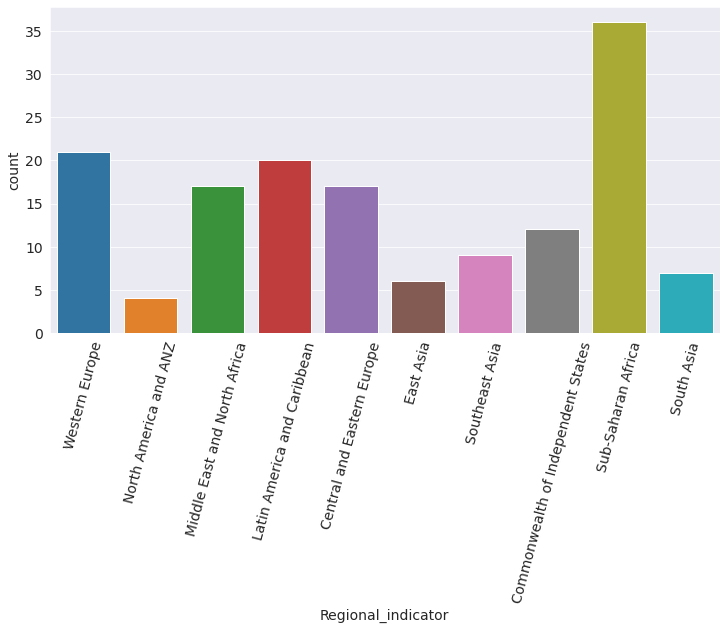

In [21]:
sns.countplot(world_happiness_2021_df.Regional_indicator)
plt.xticks(rotation = 75);

Sub-Saharan Africa has the highest number of countries in the data, followed by Western Europe, while North America has the least.

#### Distribution of other features

`Boxplot`: a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”).

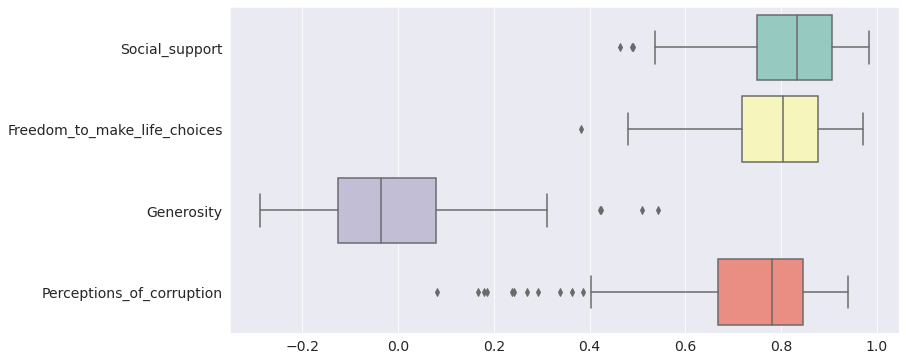

In [22]:
selected_columns = ['Social_support', 'Freedom_to_make_life_choices', 'Generosity', 'Perceptions_of_corruption']

sns.boxplot(data = world_happiness_2021_df[selected_columns], orient = 'h', palette = 'Set3');

In [23]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "darpit-choudhary/un-world-happiness-report-2021" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/darpit-choudhary/un-world-happiness-report-2021


'https://jovian.ai/darpit-choudhary/un-world-happiness-report-2021'

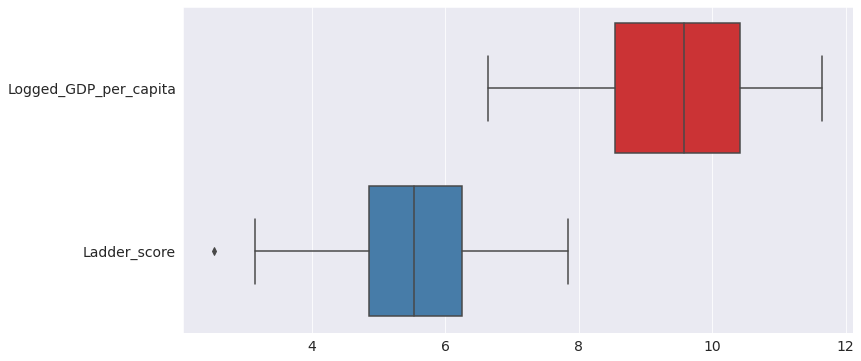

In [24]:
seleceted_columns2 = ['Logged_GDP_per_capita', 'Ladder_score']
sns.boxplot(data = world_happiness_2021_df[seleceted_columns2], orient = 'h', palette = 'Set1');

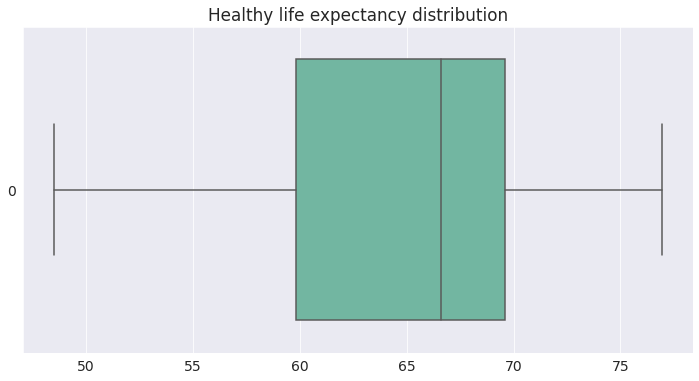

In [25]:
plt.title('Healthy life expectancy distribution')
sns.boxplot(data = world_happiness_2021_df['Healthy_life_expectancy'], orient = 'h', palette = 'Set2');

## Asking and answering questions

#### Q. What are the 10 most happiest and 10 least happiest countries in 2021?

In [26]:
most_happiest = world_happiness_2021_df.sort_values('Ladder_score', ascending = False).head(10)
most_happiest

,Country_name,Regional_indicator,Ladder_score,Standard_error_of_ladder_score,upperwhisker,lowerwhisker,Logged_GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Ladder_score_in_Dystopia,Explained_by:_Log_GDP_per_capita,Explained_by:_Social_support,Explained_by:_Healthy_life_expectancy,Explained_by:_Freedom_to_make_life_choices,Explained_by:_Generosity,Explained_by:_Perceptions_of_corruption,Dystopia_+_residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798
5,Norway,Western Europe,7.392,0.035,7.462,7.323,11.053,0.954,73.3,0.960,0.093,0.270,2.43,1.543,1.108,0.782,0.703,0.249,0.427,2.580
6,Sweden,Western Europe,7.363,0.036,7.433,7.293,10.867,0.934,72.7,0.945,0.086,0.237,2.43,1.478,1.062,0.763,0.685,0.244,0.448,2.683
7,Luxembourg,Western Europe,7.324,0.037,7.396,7.252,11.647,0.908,72.6,0.907,-0.034,0.386,2.43,1.751,1.003,0.760,0.639,0.166,0.353,2.653
8,New Zealand,North America and ANZ,7.277,0.040,7.355,7.198,10.643,0.948,73.4,0.929,0.134,0.242,2.43,1.400,1.094,0.785,0.665,0.276,0.445,2.612
9,Austria,Western Europe,7.268,0.036,7.337,7.198,10.906,0.934,73.3,0.908,0.042,0.481,2.43,1.492,1.062,0.782,0.640,0.215,0.292,2.784


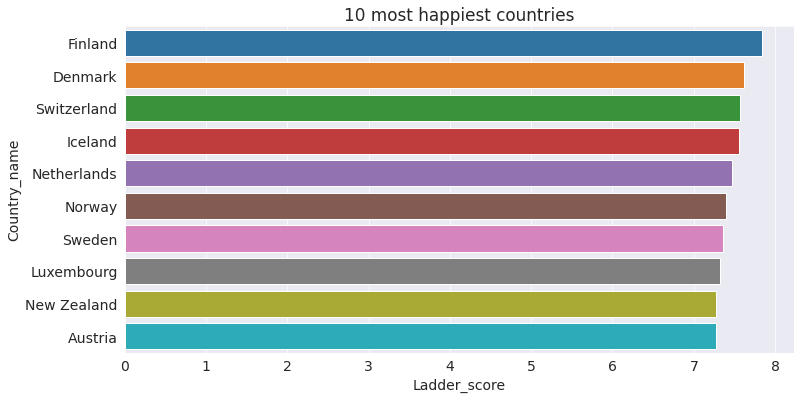

In [27]:
plt.title("10 most happiest countries")
sns.set_color_codes('muted')
sns.barplot(x = 'Ladder_score', y = 'Country_name', data = most_happiest);

In [28]:
least_happiest = world_happiness_2021_df.sort_values('Ladder_score', ascending = True).head(10)
least_happiest

,Country_name,Regional_indicator,Ladder_score,Standard_error_of_ladder_score,upperwhisker,lowerwhisker,Logged_GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Ladder_score_in_Dystopia,Explained_by:_Log_GDP_per_capita,Explained_by:_Social_support,Explained_by:_Healthy_life_expectancy,Explained_by:_Freedom_to_make_life_choices,Explained_by:_Generosity,Explained_by:_Perceptions_of_corruption,Dystopia_+_residual
148,Afghanistan,South Asia,2.523,0.038,2.596,2.449,7.695,0.463,52.493,0.382,-0.102,0.924,2.43,0.370,0.000,0.126,0.000,0.122,0.010,1.895
147,Zimbabwe,Sub-Saharan Africa,3.145,0.058,3.259,3.030,7.943,0.750,56.201,0.677,-0.047,0.821,2.43,0.457,0.649,0.243,0.359,0.157,0.075,1.205
146,Rwanda,Sub-Saharan Africa,3.415,0.068,3.548,3.282,7.676,0.552,61.400,0.897,0.061,0.167,2.43,0.364,0.202,0.407,0.627,0.227,0.493,1.095
145,Botswana,Sub-Saharan Africa,3.467,0.074,3.611,3.322,9.782,0.784,59.269,0.824,-0.246,0.801,2.43,1.099,0.724,0.340,0.539,0.027,0.088,0.648
144,Lesotho,Sub-Saharan Africa,3.512,0.120,3.748,3.276,7.926,0.787,48.700,0.715,-0.131,0.915,2.43,0.451,0.731,0.007,0.405,0.103,0.015,1.800
143,Malawi,Sub-Saharan Africa,3.600,0.092,3.781,3.419,6.958,0.537,57.948,0.780,0.038,0.729,2.43,0.113,0.168,0.298,0.484,0.213,0.134,2.190
142,Haiti,Latin America and Caribbean,3.615,0.173,3.953,3.276,7.477,0.540,55.700,0.593,0.422,0.721,2.43,0.294,0.173,0.227,0.257,0.463,0.139,2.060
141,Tanzania,Sub-Saharan Africa,3.623,0.071,3.762,3.485,7.876,0.702,57.999,0.833,0.183,0.577,2.43,0.433,0.540,0.300,0.549,0.307,0.231,1.263
140,Yemen,Middle East and North Africa,3.658,0.070,3.794,3.521,7.578,0.832,57.122,0.602,-0.147,0.800,2.43,0.329,0.831,0.272,0.268,0.092,0.089,1.776
139,Burundi,Sub-Saharan Africa,3.775,0.107,3.985,3.565,6.635,0.490,53.400,0.626,-0.024,0.607,2.43,0.000,0.062,0.155,0.298,0.172,0.212,2.876


`Finland` is the happiest country for the 4th time, while `Afghanistan` is the least happiest country.

In [29]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "darpit-choudhary/un-world-happiness-report-2021" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/darpit-choudhary/un-world-happiness-report-2021


'https://jovian.ai/darpit-choudhary/un-world-happiness-report-2021'

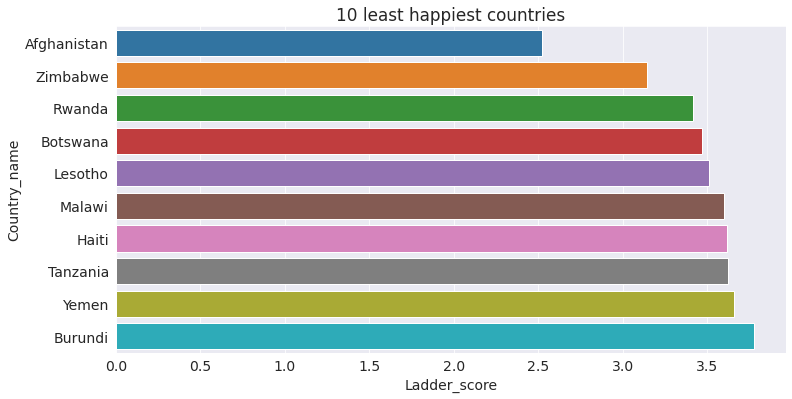

In [30]:
plt.title("10 least happiest countries")
sns.barplot(x = 'Ladder_score', y = 'Country_name', data = least_happiest);

In [31]:
before_2021_df2 = before_2021_df.groupby('Country_name').mean()
before_2021_df2

,year,Life_Ladder,Log_GDP_per_capita,Social_support,Healthy_life_expectancy_at_birth,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Positive_affect,Negative_affect
Country_name,,,,,,,,,,
Afghanistan,2018.0,2.577000,7.695333,0.473000,52.60,0.398333,-0.107667,0.935333,0.423667,0.426000
Albania,2018.5,5.001000,9.508750,0.679500,68.85,0.776250,-0.028000,0.895000,0.685500,0.298000
Algeria,2018.0,5.012333,9.346333,0.803000,65.90,0.468333,-0.102667,0.733333,0.606000,0.265667
Argentina,2018.5,5.954750,9.987250,0.900000,68.90,0.829500,-0.182500,0.835500,0.804750,0.318500
Armenia,2018.0,4.946000,9.458333,0.764667,66.90,0.755333,-0.160667,0.708333,0.601333,0.440667
...,...,...,...,...,...,...,...,...,...,...
Venezuela,2018.5,4.933000,9.073000,0.869000,66.60,0.621250,-0.169000,0.830500,0.742000,0.371000
Vietnam,2018.0,5.312667,8.934000,0.840000,67.90,0.930500,-0.083500,0.798000,0.721500,0.188500
Yemen,2018.0,3.503000,7.578000,0.816333,56.70,0.599667,-0.147000,0.795500,0.486333,0.274333


A new dataset `before_2021_df2` is created by grouping the data for each country. This dataset contains the mean of values over the years 2017-2020. This data will be useful for comparison with data from 2021.

#### Q. Compare the happiness score of top 10 most happiest countries in the year 2021 and the features contributing in it with previous years.

In [32]:
# a new dataframe
score_df = pd.DataFrame()
score_df['Country'] = most_happiest['Country_name']
score_df['Ladder_score_2021'] = most_happiest['Ladder_score']
score_df['Ladder_score_before_2021'] = before_2021_df2.loc[most_happiest.Country_name].Life_Ladder.values
score_df

,Country,Ladder_score_2021,Ladder_score_before_2021
0,Finland,7.842,7.82875
1,Denmark,7.620,7.61275
2,Switzerland,7.571,7.54625
3,Iceland,7.554,7.52800
4,Netherlands,7.464,7.46275
5,Norway,7.392,7.43875
6,Sweden,7.363,7.34350
7,Luxembourg,7.324,7.23600
8,New Zealand,7.277,7.28975
9,Austria,7.268,7.27450


We have created a new dataframe `new_df` which contains three columns `Country`, `Ladder_score_2021`, and `Ladder_score_before_2021`.
- **Columns**: The 10 most happiest countries in 2021
- **Ladder_score_2021**: Happiness score in the year 2021
- **Ladder_score_before_2021**: Average of happiness score over the years 2017-2020

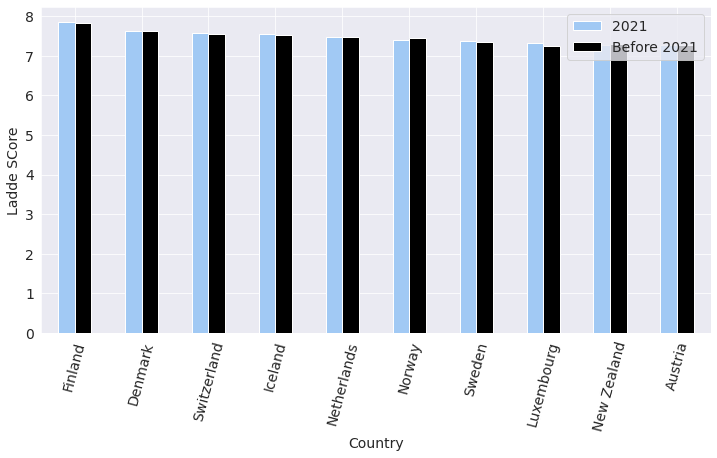

In [33]:
sns.set_color_codes('pastel')
score_df.plot(kind = 'bar', x = 'Country', color = ['b', 'black'])
plt.legend(['2021', 'Before 2021'])
plt.xticks(rotation = 75)
plt.ylabel('Ladde SCore');

Except Norway, for all other countries in the top 10, the happiness score in the year 2021 was higher than average of happiness score over the years 2017-2020.

In [34]:
# change in GDP per capita
gdp_df = pd.DataFrame()
gdp_df['Country'] = most_happiest.Country_name
gdp_df['Logged_GDP_2021'] = most_happiest.Logged_GDP_per_capita
gdp_df['Logged_GDP_before_2021'] = before_2021_df2.loc[most_happiest.Country_name].Log_GDP_per_capita.values
gdp_df

,Country,Logged_GDP_2021,Logged_GDP_before_2021
0,Finland,10.775,10.773250
1,Denmark,10.933,10.928750
2,Switzerland,11.117,11.116500
3,Iceland,10.878,10.893333
4,Netherlands,10.932,10.929000
5,Norway,11.053,11.052250
6,Sweden,10.867,10.868500
7,Luxembourg,11.647,11.642333
8,New Zealand,10.643,10.639750
9,Austria,10.906,10.906500


- **Logged_GDP_2021**- natural log of GDP per capita in the year 2021
- **Logged_GDP_before_2021**- average of natural log of GDP per capita over the years 2017-2020

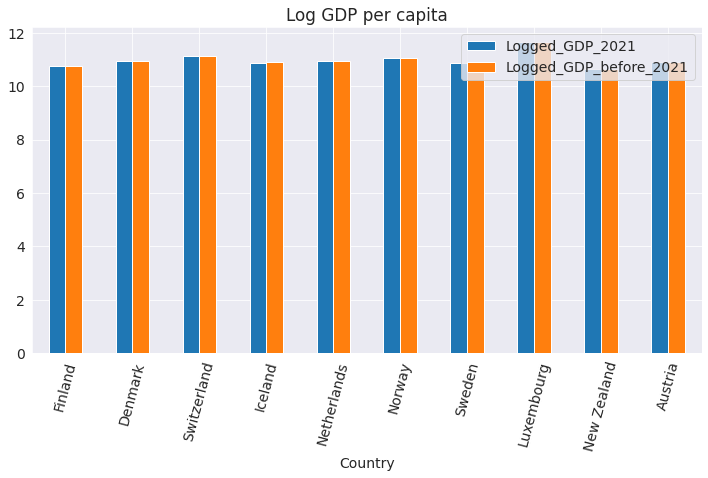

In [35]:
gdp_df.plot(kind = 'bar', x = 'Country')
plt.xticks(rotation = 75)
plt.title("Log GDP per capita");

In [36]:
# Social support
social_df = pd.DataFrame()
social_df['Country'] = most_happiest.Country_name
social_df['Social_support_2021'] = most_happiest.Social_support
social_df['Social_support_before_2021'] = before_2021_df2.loc[most_happiest.Country_name].Social_support.values
social_df

,Country,Social_support_2021,Social_support_before_2021
0,Finland,0.954,0.956250
1,Denmark,0.954,0.953750
2,Switzerland,0.942,0.943750
3,Iceland,0.983,0.977333
4,Netherlands,0.942,0.940250
5,Norway,0.954,0.953500
6,Sweden,0.934,0.928750
7,Luxembourg,0.908,0.906333
8,New Zealand,0.948,0.950000
9,Austria,0.934,0.926750


- **Social_support_2021**: social support rating for the year 2021
- **Social_support_before_2021**: average of social support rating over the years 2017-2020.

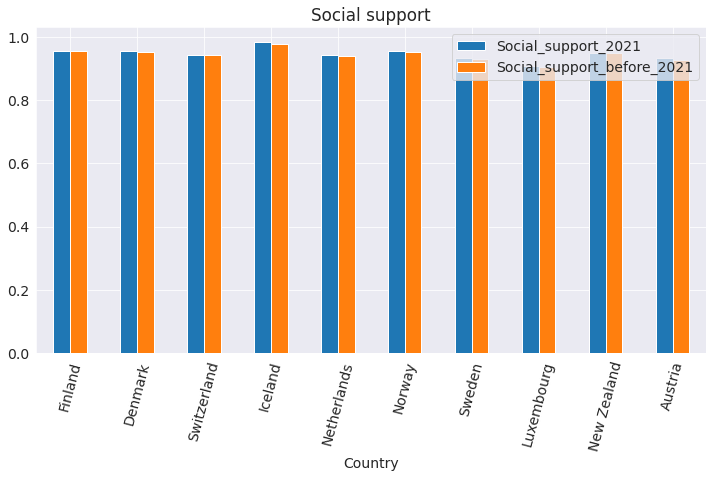

In [37]:
social_df.plot(kind = 'bar', x = 'Country')
plt.xticks(rotation = 75)
plt.title("Social support");

There doesn't seem to be much change in the `Logged GDP per capita`and `social support` data in 2021 from the previous years.

Luxembourg has the highest GDP per capita, while Finland has the least among the happiest 

#### Q. What is the regional happiness distribution?

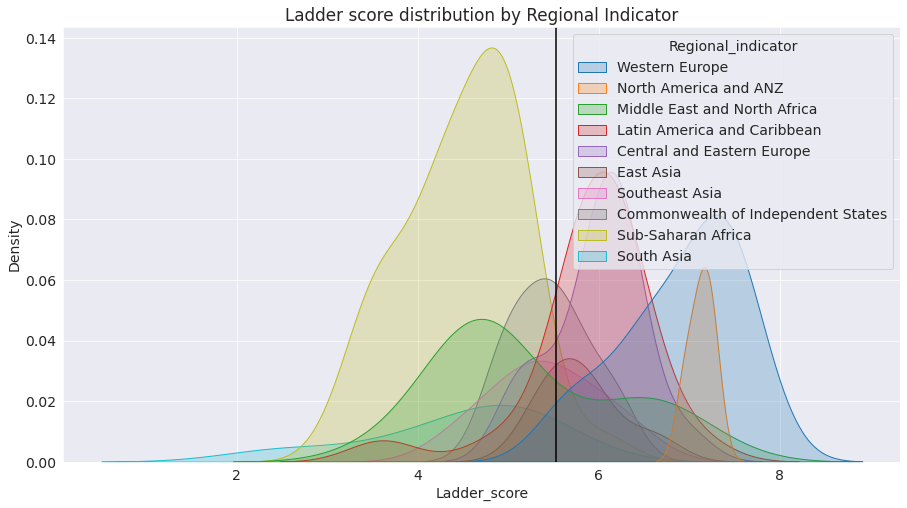

In [38]:
plt.figure(figsize = (15,8))
sns.kdeplot('Ladder_score', hue = 'Regional_indicator', data = world_happiness_2021_df, fill = True)
plt.axvline(world_happiness_2021_df.Ladder_score.mean(), c = 'black')
plt.title("Ladder score distribution by Regional Indicator");

Density distribution of ladder score for different regions.

In [39]:
regional_df = world_happiness_2021_df.groupby('Regional_indicator').mean()
regional_df

,Ladder_score,Standard_error_of_ladder_score,upperwhisker,lowerwhisker,Logged_GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Ladder_score_in_Dystopia,Explained_by:_Log_GDP_per_capita,Explained_by:_Social_support,Explained_by:_Healthy_life_expectancy,Explained_by:_Freedom_to_make_life_choices,Explained_by:_Generosity,Explained_by:_Perceptions_of_corruption,Dystopia_+_residual
Regional_indicator,,,,,,,,,,,,,,,,,,
Central and Eastern Europe,5.984765,0.048471,6.079941,5.889529,10.109059,0.887412,68.338412,0.797059,-0.078941,0.850529,2.43,1.213588,0.957235,0.625529,0.505353,0.136353,0.056588,2.490000
Commonwealth of Independent States,5.467000,0.046750,5.558417,5.375250,9.401833,0.872500,65.009500,0.816917,-0.036000,0.725083,2.43,0.966500,0.923500,0.520583,0.529500,0.164583,0.136667,2.225750
East Asia,5.810333,0.040000,5.889500,5.731667,10.367667,0.860500,71.252167,0.763500,-0.062333,0.683333,2.43,1.304000,0.896667,0.717333,0.464667,0.147333,0.163000,2.117833
Latin America and Caribbean,5.908050,0.073900,6.052800,5.763150,9.370000,0.839500,67.076050,0.831750,-0.067700,0.792600,2.43,0.955400,0.848900,0.585800,0.547550,0.143700,0.093650,2.733000
Middle East and North Africa,5.219765,0.057000,5.331176,5.108059,9.666118,0.797647,65.609118,0.716471,-0.079765,0.762235,2.43,1.058882,0.754588,0.539529,0.407353,0.135765,0.113000,2.210588
North America and ANZ,7.128500,0.043000,7.213000,7.044250,10.809500,0.933500,72.325000,0.898750,0.120000,0.449250,2.43,1.458250,1.061000,0.751250,0.628500,0.266250,0.312750,2.650500
South Asia,4.441857,0.055143,4.549286,4.334143,8.682571,0.703429,62.681000,0.765000,0.042714,0.797429,2.43,0.715286,0.542286,0.447286,0.466429,0.215857,0.090571,1.964000
Southeast Asia,5.407556,0.050000,5.505556,5.309444,9.421444,0.820333,64.888444,0.909000,0.156333,0.709111,2.43,0.973556,0.805667,0.516889,0.641444,0.289889,0.146667,2.033444
Sub-Saharan Africa,4.494472,0.078333,4.648250,4.340889,8.075194,0.696750,55.886472,0.723194,0.013444,0.765944,2.43,0.503111,0.527611,0.233333,0.415500,0.196694,0.110583,2.507722


New database `regional_df` made by grouping the `world_happiness_2021_df` dataset by `Regional_indicator` column and taking the mean of the values for each region.

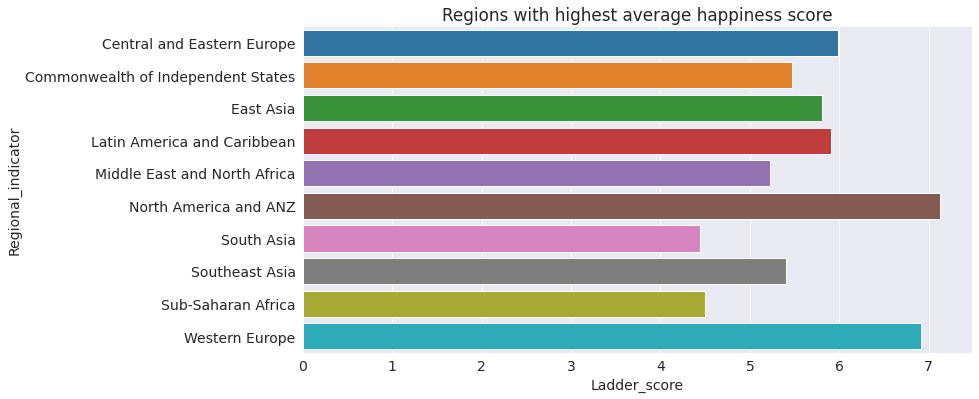

In [40]:
plt.title("Regions with highest average happiness score")
sns.barplot(x = 'Ladder_score', y = regional_df.index, data = regional_df);

North America is the happiest region, while South Asia is the least happiest.

#### What are the contributions of various features in happiness score?

In [41]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "darpit-choudhary/un-world-happiness-report-2021" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/darpit-choudhary/un-world-happiness-report-2021


'https://jovian.ai/darpit-choudhary/un-world-happiness-report-2021'

In [42]:
contribution_df = world_happiness_2021_df[['Country_name',
                                           #'Ladder_score',
                                           'Explained_by:_Log_GDP_per_capita', 
                                           'Explained_by:_Perceptions_of_corruption',
                                          'Explained_by:_Social_support',
                                          'Explained_by:_Healthy_life_expectancy',
                                          'Explained_by:_Generosity',
                                          'Explained_by:_Freedom_to_make_life_choices',
                                          'Dystopia_+_residual']].head(10)
contribution_df

,Country_name,Explained_by:_Log_GDP_per_capita,Explained_by:_Perceptions_of_corruption,Explained_by:_Social_support,Explained_by:_Healthy_life_expectancy,Explained_by:_Generosity,Explained_by:_Freedom_to_make_life_choices,Dystopia_+_residual
0,Finland,1.446,0.481,1.106,0.741,0.124,0.691,3.253
1,Denmark,1.502,0.485,1.108,0.763,0.208,0.686,2.868
2,Switzerland,1.566,0.413,1.079,0.816,0.204,0.653,2.839
3,Iceland,1.482,0.170,1.172,0.772,0.293,0.698,2.967
4,Netherlands,1.501,0.384,1.079,0.753,0.302,0.647,2.798
5,Norway,1.543,0.427,1.108,0.782,0.249,0.703,2.580
6,Sweden,1.478,0.448,1.062,0.763,0.244,0.685,2.683
7,Luxembourg,1.751,0.353,1.003,0.760,0.166,0.639,2.653
8,New Zealand,1.400,0.445,1.094,0.785,0.276,0.665,2.612
9,Austria,1.492,0.292,1.062,0.782,0.215,0.640,2.784


<Figure size 1080x432 with 0 Axes>

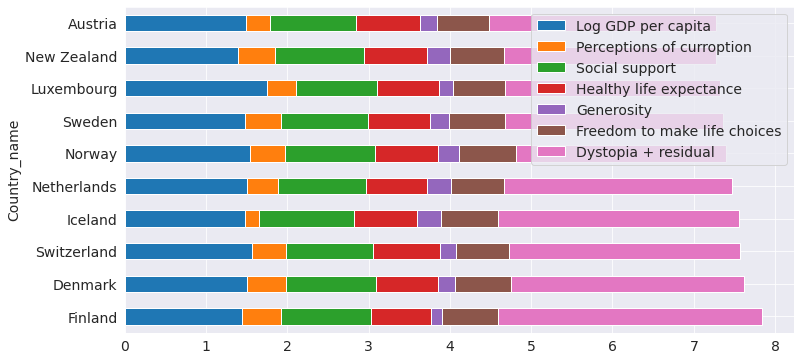

In [43]:
plt.figure(figsize = (15,6));
contribution_df.plot(kind = 'barh', stacked = True, x = 'Country_name');
plt.legend(['Log GDP per capita', 'Perceptions of curroption', 'Social support', 'Healthy life expectance', 'Generosity', 'Freedom to make life choices', 'Dystopia + residual']);

Here we can see the contribution of various factors like `GDP per capita`, `Social support`, etc. in the happiness score.

In [44]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "darpit-choudhary/un-world-happiness-report-2021" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/darpit-choudhary/un-world-happiness-report-2021


'https://jovian.ai/darpit-choudhary/un-world-happiness-report-2021'

#### Q. What is the relation between happiness and GDP per capita?

In [45]:
world_happiness_2021_df

,Country_name,Regional_indicator,Ladder_score,Standard_error_of_ladder_score,upperwhisker,lowerwhisker,Logged_GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Ladder_score_in_Dystopia,Explained_by:_Log_GDP_per_capita,Explained_by:_Social_support,Explained_by:_Healthy_life_expectancy,Explained_by:_Freedom_to_make_life_choices,Explained_by:_Generosity,Explained_by:_Perceptions_of_corruption,Dystopia_+_residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.000,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.700,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.400,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.000,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.400,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,Lesotho,Sub-Saharan Africa,3.512,0.120,3.748,3.276,7.926,0.787,48.700,0.715,-0.131,0.915,2.43,0.451,0.731,0.007,0.405,0.103,0.015,1.800
145,Botswana,Sub-Saharan Africa,3.467,0.074,3.611,3.322,9.782,0.784,59.269,0.824,-0.246,0.801,2.43,1.099,0.724,0.340,0.539,0.027,0.088,0.648
146,Rwanda,Sub-Saharan Africa,3.415,0.068,3.548,3.282,7.676,0.552,61.400,0.897,0.061,0.167,2.43,0.364,0.202,0.407,0.627,0.227,0.493,1.095
147,Zimbabwe,Sub-Saharan Africa,3.145,0.058,3.259,3.030,7.943,0.750,56.201,0.677,-0.047,0.821,2.43,0.457,0.649,0.243,0.359,0.157,0.075,1.205


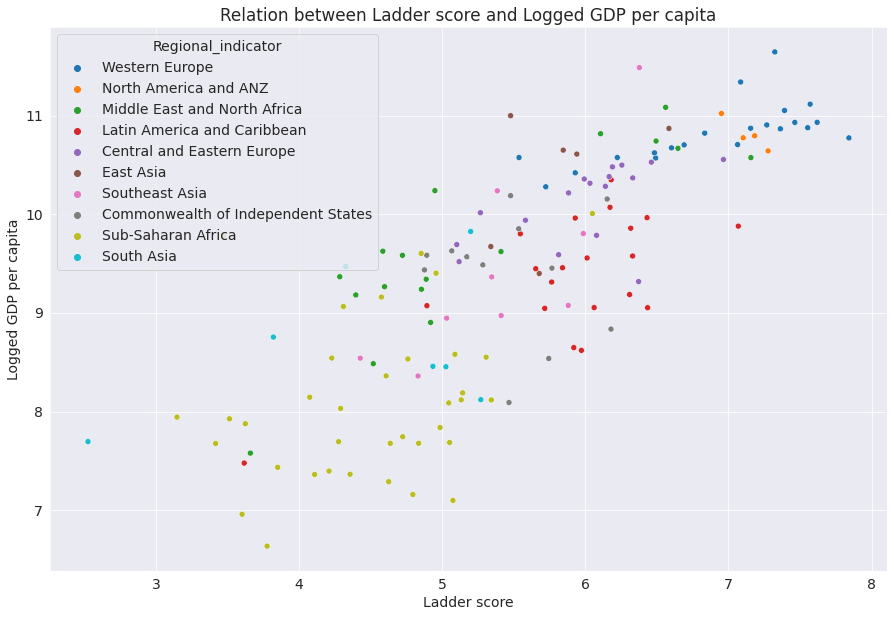

In [46]:
plt.figure(figsize = (15,10))
plt.title('Relation between Ladder score and Logged GDP per capita')
sns.scatterplot(x = 'Ladder_score', y = 'Logged_GDP_per_capita', hue = 'Regional_indicator', data = world_happiness_2021_df)
plt.xlabel('Ladder score')
plt.ylabel('Logged GDP per capita');

Countries with higher Logged GDP per capita have higher happiness score. Countries in North America ans Western Europe have high logged GDP per capita and naturally a higher happiness score, while countries in Sub-Saharan Africa have low logged GDP per capita and hence a lower Ladder score. 

Countries with higher population sizes and lower life-expectancy tend to have lower GDP per capita, such as the case for the countries in Sub-Saharan Africa.

#### Q. What is the relation between happiness and freedom?

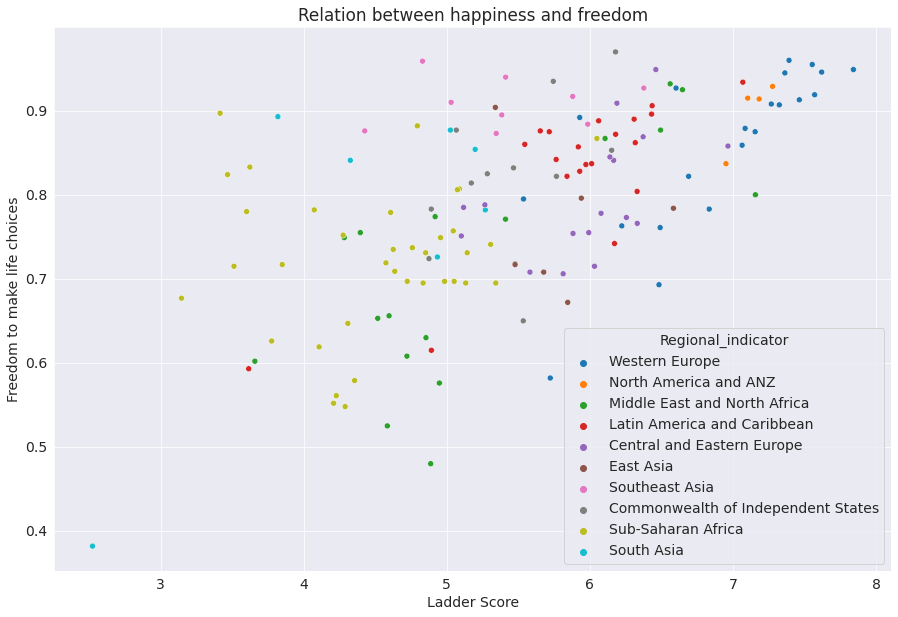

In [47]:
plt.figure(figsize = (15,10))
plt.title("Relation between happiness and freedom")
sns.scatterplot(x = 'Ladder_score', y = 'Freedom_to_make_life_choices', hue = 'Regional_indicator', data = world_happiness_2021_df)
plt.xlabel('Ladder Score')
plt.ylabel('Freedom to make life choices');

Freedom is positively related to happiness among the rich nations, but not among the poor nations. This can be seen in the plot above, although countries in Sub-Saharan Africa have high freedom rating, their happiness score is still lower compared to rich countries in the same freedom range.

#### Q. What is the relation between happiness and corruption?

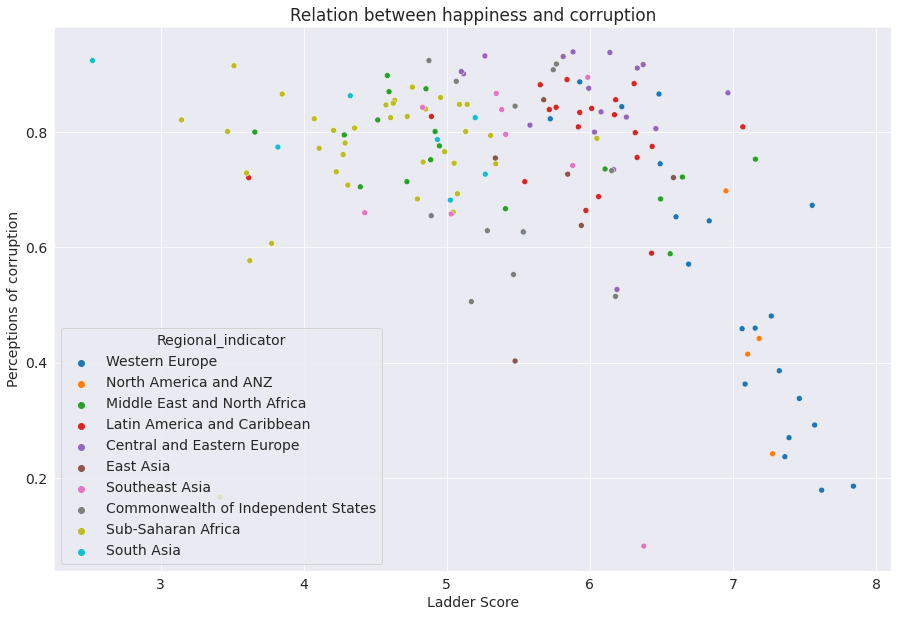

In [48]:
plt.figure(figsize = (15,10))
plt.title("Relation between happiness and corruption")
sns.scatterplot(x = 'Ladder_score', y = 'Perceptions_of_corruption', hue = 'Regional_indicator', data = world_happiness_2021_df)
plt.xlabel('Ladder Score')
plt.ylabel('Perceptions of corruption');

Perceived corruption has a negative impact on happiness, countries with high perceived corruption have lower happiness score. The negative relationship between perceived corruption and life satisfaction is larger in more developed countries and regions, relative to that in developing areas.

In [120]:
world_happiness_df[world_happiness_df.Country_name == 'India']

,Country_name,year,Life_Ladder,Log_GDP_per_capita,Social_support,Healthy_life_expectancy_at_birth,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Positive_affect,Negative_affect
732,India,2006,5.348,8.145,0.707,55.72,0.774,NaN,0.855,0.687,0.199
733,India,2007,5.027,8.204,0.569,56.14,0.729,-0.051,0.862,0.668,0.253
734,India,2008,5.146,8.220,0.684,56.56,0.756,-0.072,0.891,0.674,0.259
735,India,2009,4.522,8.281,0.653,56.98,0.679,-0.026,0.895,0.771,0.301
736,India,2010,4.989,8.349,0.605,57.40,0.783,0.058,0.863,0.697,0.267
737,India,2011,4.635,8.387,0.553,57.70,0.838,-0.038,0.908,0.648,0.232
738,India,2012,4.720,8.428,0.511,58.00,0.609,0.067,0.830,0.629,0.295
739,India,2013,4.428,8.478,0.553,58.30,0.740,0.084,0.832,0.680,0.330
740,India,2014,4.424,8.538,0.621,58.60,0.809,-0.026,0.832,0.711,0.285
741,India,2015,4.342,8.604,0.610,58.90,0.777,-0.005,0.776,0.701,0.322


In [113]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "darpit-choudhary/un-world-happiness-report-2021" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/darpit-choudhary/un-world-happiness-report-2021


'https://jovian.ai/darpit-choudhary/un-world-happiness-report-2021'

## Inferences and Conclusion

Based on our analysis of the survey we've drawn many inferences. Here's a brief summary:
- Sub-Saharan Africa has the highest number of countries listed in the survey.
- For countries with highest happiness score, there doesn't seem to be much change in the data from previous years.
- Finland is the happiest country for the 4th year in a row, while Afghanistan is the unhappiest.
- India ranked 139th in the World happiness report 2021.
- Indonesia is the most generous country, while Greece is the least generous.
- Luxembourg has the highest Logged GDP, while Burundi, a country in Sub-Saharan Africa has the least.
- Croatia has the highest perceived corruption, while Singapore has the least.
- North America and ANZ is the happiest region, while South Asia is the least happiest.
- Logged GDP per capita has positive relation with Ladder score, countries with high GDP per capita tend to be happier.
- Freedom to make choices has positive relation with happiness among rich countries, like those in Western Europe and North America, but not among the poor nations.
- Perceived corruption has a negative impact on happiness, countries with high perceived corruption tend to have lower happiness score.

### References:
- The dataset: https://www.kaggle.com/ajaypalsinghlo/world-happiness-report-2021
- Boxplot documentation: https://seaborn.pydata.org/generated/seaborn.boxplot.html

### Future work:
- I plan to use advanced visualization libraries like **plotly** to make the charts interactive.
- Merging the happiness dataset with Covid-19 dataset and analyze the affects of pandemic on happiness score and six major factors contributing in it.


In [122]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "darpit-choudhary/un-world-happiness-report-2021" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/darpit-choudhary/un-world-happiness-report-2021


'https://jovian.ai/darpit-choudhary/un-world-happiness-report-2021'